# Tentang Data

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.
<br>
Ada empat kumpulan data:
1) bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat mirip dengan data yang dianalisis di [Moro et al., 2014 ] <br>
2) bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.<br>
3) bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan lebih sedikit input).<br>
4) bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).
<br>
Kumpulan data terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih menuntut komputasi (misalnya, SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

# Isi Dataset

**Input variables:**
    
**bank client data:**<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
<br>
**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br>
**other attributes:**<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
**social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)
<br>
**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm 

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline

import seaborn as sns
sns.set(style = 'white', color_codes = True)

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree

import sklearn.linear_model as linear_model

# Read Data

In [2]:
df_bank = pd.read_csv('D:/HACTIVE/dataset/bank-additional-full.csv', delimiter=';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**INTERPRETASI**

data yang digunakan pada tugas 3 ini adalah data bank-additional-full-csv dimana data ini memiliki 41.188 data dan 21 kolom dengan 3 type data yaitu float64, int64 dan object.

# Data Preprocessing and cleaning

## Cek Missing Value

In [4]:
df_bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
df_bank.isnull().values.any()

False

**INTERPRETASI**

cek missing values data diatas menghasilkan "**FALSE**" artinya tidak memiliki missing value.

## Cek Data Duplikat

In [6]:
df_bank.duplicated().any()

True

In [7]:
df_bank.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [8]:
# Menghapus data duplikat
df_bank.drop_duplicates(inplace=True)

In [9]:
df_bank.duplicated().any()

False

In [10]:
# Memastikan data duplikat sudah dihapus
df_bank.duplicated().sum()

0

**INTERPRETASI**

Setelah dicek duplikat, ternyata data bank memiliki data yang duplikat sebanyak 12 data. oleh karena itu data harus di hapus.

## Menghapus kolom yang tidak digunakan

In [11]:
df_bank = df_bank.drop(columns=['duration'])

In [12]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

**INTERPRETASI**

Menghapus kolom durasi, karena analisis ini bertujuan untuk memiliki model prediksi maka kolom durasi harus di buang.

# Visualisasi Data

In [13]:
df_bank.shape

(41176, 20)

**PERSENTASE CLIENT JOB**

In [14]:
def create_list_number_bank(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df_bank.loc[df_bank[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 

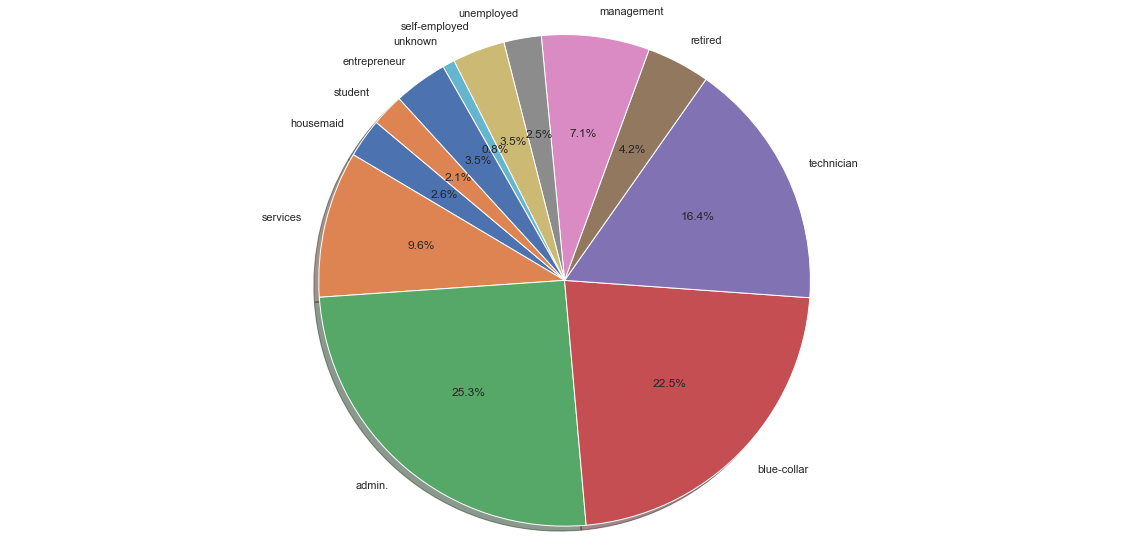

In [15]:
list_unique_job, list_number_job = create_list_number_bank('job',df_bank['job'].unique())
pie_plot(list_unique_job, list_number_job)

In [16]:
#List job
job = list(df_bank["job"].unique())
job

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']

In [17]:
len(job)

12

**INTERPRETASI**

Berdasarkan pie chart diatas dapat dilihat pekerjaan dari klien lembaga bank portugis ini terdapat 12 kategori pekerjaan, dimana pekerjaan dengan persentase terbanyak yaitu admin sebesar 25,3% , sedangkan untuk pekerjaan unknown paling sedikit sebesar 0,8% jenis pekerjaan ini tidak diketahui. 

**BERAPA BANYAK KLIEN YANG MEMILIKI KREDIT (DEFAULT)**

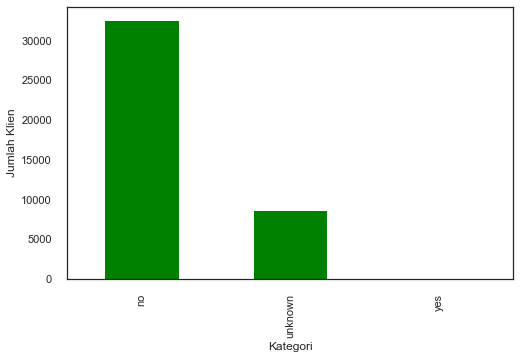

In [18]:
df_default = df_bank['default'].value_counts()

df_default.plot(kind='bar', color='green', figsize=(8,5))

plt.xlabel('Kategori')
plt.ylabel('Jumlah Klien')
plt.ylim(ymin=0)

plt.show()

In [19]:
df_default

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

**INTERPRETASI**

Berdasarkan bar chart diatas, dapat dilihat bahwa jumlah klien yang tidak memiliki kredit paling banyak yaitu 32.577 klien, sedangkan yang memiliki kredit hanya 3 klien. untuk sisanya tidak diketahui apakah memiliki kredit atau tidak sebanyak 8.596 klien.

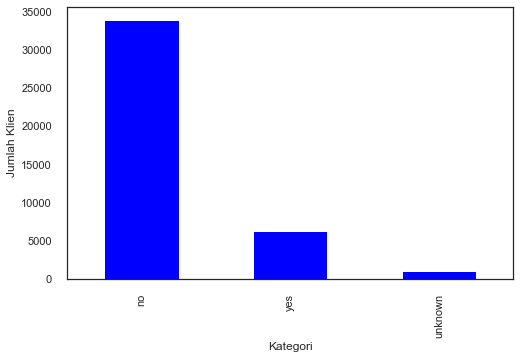

In [20]:
df_loan = df_bank['loan'].value_counts()

df_loan.plot(kind='bar', color='blue', figsize=(8,5))

plt.xlabel('Kategori')
plt.ylabel('Jumlah Klien')
plt.ylim(ymin=0)

plt.show()

In [21]:
df_loan

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

**INTERPRETASI**

Berdasarkan bar chart diatas, dapat dilihat bahwa jumlah klien yang tidak memiliki pinjaman pribadi paling banyak yaitu 33.938 klien, sedangkan yang memiliki pinjaman yaitu 6.248 klien. untuk sisanya tidak diketahui apakah memiliki pinjaman atau tidak sebanyak 990 klien.

**JUMLAH KLIEN YANG MEMILIKI DEPOSIT**

In [22]:
df_deposit = df_bank['y'].value_counts()
df_deposit

no     36537
yes     4639
Name: y, dtype: int64

In [23]:
labels = df_bank['y'].unique()
labels

array(['no', 'yes'], dtype=object)

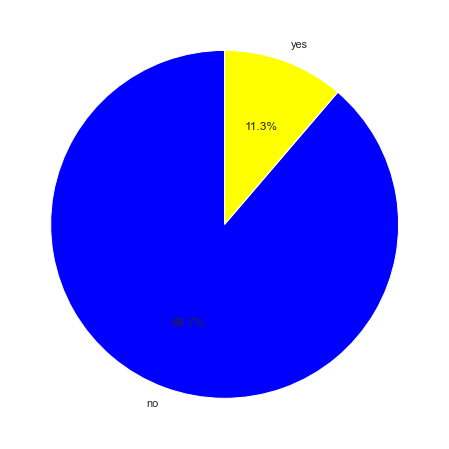

In [24]:
plt.figure(figsize=(8,8))
colors=['blue', 'yellow']
font = {'weight': 'bold','size': 10,}
ax = plt.axes()

plt.pie(df_deposit,
        labels=labels,
        colors=colors,
        startangle=90,
        autopct='%1.1f%%')
plt.show()

**INTERPRETASI**

Berdasarkan pie chart diatas dapat dilihat klien yang telah berlangganan deposit berjangka sebanyak 11.3% atau sekitar 4.639 klien, sisanya belum berlangganan.

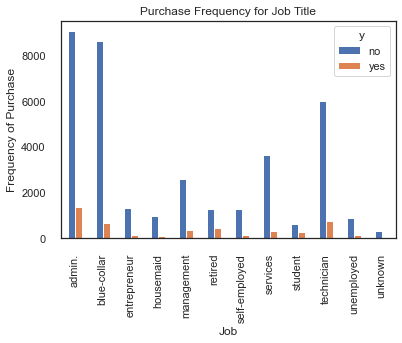

In [25]:
pd.crosstab(df_bank.job,df_bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')

plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

plt.savefig('purchase_fre_job') 

**INTERPRETASI**

Frekuensi berlangganan deposit bergantung pada pekerjaan, dengan demikian pekerjaan merupakan prediktor yang baik dari variabel hasil.

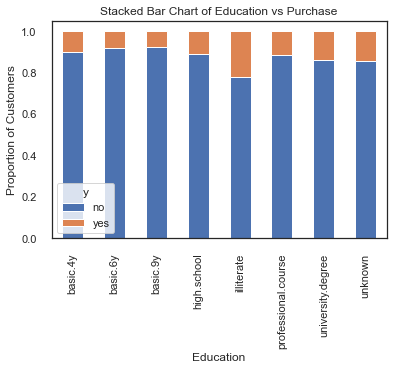

In [26]:
table=pd.crosstab(df_bank.education,df_bank.y)  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)  
plt.title('Stacked Bar Chart of Education vs Purchase')  
plt.xlabel('Education')  
plt.ylabel('Proportion of Customers')  
plt.savefig('edu_vs_pur_stack')  

**INTERPRETASI**

Pendidikan merupakan prediktor yang baik dari variabel hasil

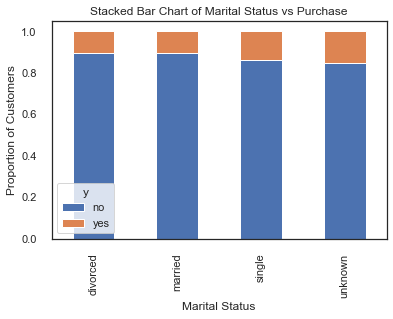

In [27]:
table=pd.crosstab(df_bank.marital,df_bank.y)  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)  
plt.title('Stacked Bar Chart of Marital Status vs Purchase')  
plt.xlabel('Marital Status')  
plt.ylabel('Proportion of Customers')  
plt.savefig('mariral_vs_pur_stack') 

**INTERPRETASI**

Status perkawinan bukan merupakan prediktor yang kuat untuk variabel hasil

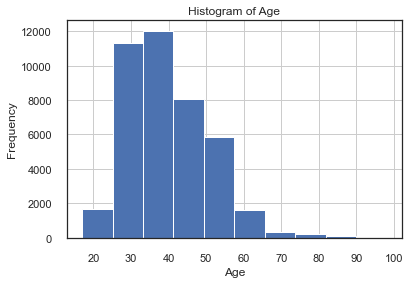

In [28]:
df_bank.age.hist()  
plt.title('Histogram of Age')  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.savefig('hist_age') 

**INTERPRETASI**

Rata-rata klien bank dalam dataset ini berusia antara 30-40 tahun.

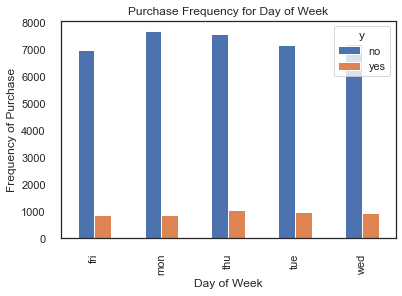

In [29]:
pd.crosstab(df_bank.day_of_week,df_bank.y).plot(kind='bar')  
plt.title('Purchase Frequency for Day of Week')  
plt.xlabel('Day of Week')  
plt.ylabel('Frequency of Purchase')  
plt.savefig('pur_dayofweek_bar')  
 

**INTERPRETASI**

Hari dalam seminggu bukan merupakan prediktor yang baik untuk hasilnya.

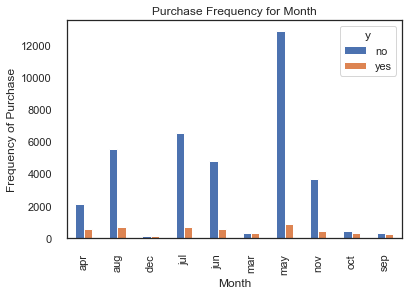

In [30]:
pd.crosstab(df_bank.month,df_bank.y).plot(kind='bar')  
plt.title('Purchase Frequency for Month')  
plt.xlabel('Month')  
plt.ylabel('Frequency of Purchase')  
plt.savefig('pur_fre_month_bar')  
 

**INTERPRETASI**

Bulan merupakan prediktor yang baik untuk variabel hasil

# Buat Variabel Dummy

Sebelum membangun model dengan 6 algoritma , data df_bank perlu di menjadi dua atau displit menjadi data training dan data testing. untuk data training 70% dan testing 30%. data training digunakan untuk melatih algoritma dalam mencari model yang sesuai sedangkan data testing dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing. sebelum displit data category diubah terlebih dahulu menjadi variabel dummy.

In [31]:
# Menghapus Kolom yang tidak digunakan

df_bank = df_bank.drop(columns=['marital','day_of_week'])

**INTERPRETASI**

Berdasarkan hasil visualisasi data yang saya buat, terlihat dari visualisasinya, saya menyimpulkan bahwa kolom marital dan day of week bukan prediktor yang baik. oleh karena itu, kedua kolom tersebut dihapus.

In [32]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   education       41176 non-null  object 
 3   default         41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null 

In [33]:
# Defining dataset
columns_num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_cat = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
columns_features = ['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_bool = ['y']

**Encoding data columns**

In [34]:
le = preprocessing.LabelEncoder()

In [35]:
# Konversi kolom kategori menjadi numerik
for col in columns_cat:
    df_bank[col] = le.fit_transform(df_bank[col])

In [36]:
df_bank.head()

,age,job,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,1,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,2,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,3,0,0,2,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
# Konversi label menjadi numerik
for col in columns_bool:
    df_bank[col] = le.fit_transform(df_bank[col])

In [38]:
df_bank

,age,job,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,3,1,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,3,0,2,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,3,0,0,2,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,0,2,0,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,5,0,0,0,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,6,0,2,0,0,7,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,5,0,0,0,0,7,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [39]:
df_bank['y'].unique()

array([0, 1])

In [40]:
df_bank.shape

(41176, 18)

**ATUR DATA MENJADI FEATURES DAN TARGET**

In [41]:
# Memilih semua fitur kecuali kolom terakhir
X = df_bank.iloc[:, :-1]

# Memilih target yaitu kolom terakhir
y = df_bank.iloc[:, -1]

In [42]:
# Split dataset menjadi training 70% dan testing 30%
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 17)
(12353, 17)
(28823,)
(12353,)


# Membangun Model

## Logistic Regression

**Generating Model**

In [44]:
model_logreg = LogisticRegression()
model_logreg.fit(x_train, y_train)

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediksi hasil testing dan menghitung akurasi**

In [45]:
y_pred_lr = model_logreg.predict(x_test)  

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr)))  

Accuracy of logistic regression classifier on test set: 0.89703


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


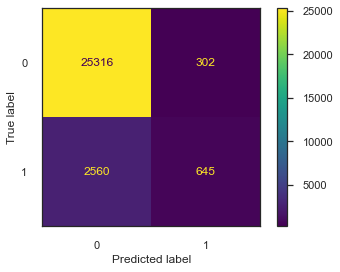

In [46]:
plot_confusion_matrix(model_logreg, x_train, y_train)

**Ketepatan hasil prediksi**

In [47]:
print(classification_report(y_test, y_pred_lr)) 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10919
           1       0.71      0.19      0.30      1434

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi regresi logistik pada data testing yaitu sebesar 0,90 atau 90%.

untuk confusion matrix menghasilkan  25.316 + 645 prediksi yang benar dan 2.560 + 302 prediksi yang salah. atau
- 25.316 prediksi negatif yang benar = 25.316 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 2.560 prediksi negatif yang salah = 2.560 pengamatan yang salah sebagai nol atau no
- 302 prediksi positif yang salah = pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 645 prediksi positif yang benar = 645 pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes


## K-Nearest Neighbor (KNN)

**Standarisasi Data**

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

**Menentukan Nilai Konstanta K**

In [49]:
error = []

In [50]:
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

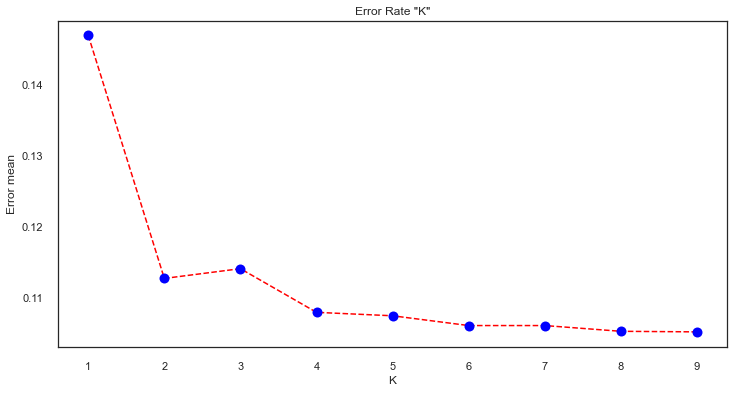

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate "K"')
plt.xlabel('K')
plt.ylabel('Error mean')

**INTERPRETASI**

Berdasarkan plot error rate "K" diatas, nilai K yang dipilih yaitu K=8 dengan tingkat error sekitar  0.05

**Generating Model**

In [52]:
model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

**Prediksi hasil testing dan menghitung akurasi**

In [53]:
y_pred_knn = model_knn.predict(X_test)

print('Accuracy of KNN classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_knn)))  

Accuracy of KNN classifier on test set: 0.89476


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


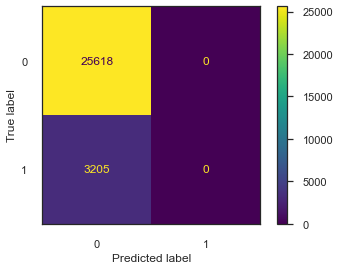

In [54]:
plot_confusion_matrix(model_knn, x_train, y_train)

**Ketepatan hasil prediksi**

In [55]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10919
           1       0.64      0.22      0.32      1434

    accuracy                           0.89     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.87      0.89      0.87     12353



**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi KNN pada data testing yaitu sebesar 0.89 atau 89%

untuk confusion matrix menghasilkan 25.618 prediksi yang benar dan 3.205 prediksi yang salah. atau

- 25.618 prediksi negatif yang benar = 25.618 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 3.205 prediksi negatif yang salah = 3.205 pengamatan yang salah sebagai nol atau no
- tidak ada prediksi positif yang salah = pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- tidak ada prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## Support Vector Machine (SVM)

**Generating Model**

In [56]:
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)

SVC()

**Prediksi hasil testing dan menghitung akurasi**

In [57]:
y_pred_svm = model_svm.predict(x_test)

print('Accuracy of SVM classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_svm)))  

Accuracy of SVM classifier on test set: 0.89549


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


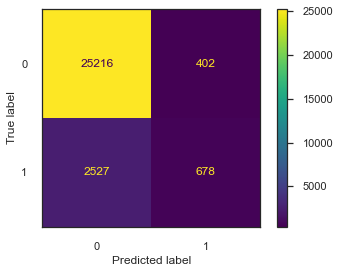

In [58]:
plot_confusion_matrix(model_svm, x_train, y_train)

**Ketepatan hasil prediksi**

In [59]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10919
           1       0.66      0.20      0.31      1434

    accuracy                           0.90     12353
   macro avg       0.78      0.59      0.63     12353
weighted avg       0.88      0.90      0.87     12353



**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi SVM pada data testing yaitu sebesar 0.90 atau 90%

untuk confusion matrix menghasilkan 25.216+678 prediksi yang benar dan 2.527+402 prediksi yang salah. atau

- 25.216 prediksi negatif yang benar = 25.216 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 2.527 prediksi negatif yang salah = 2.527 pengamatan yang salah sebagai nol atau no
- 402 prediksi positif yang salah = 402 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 678 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## Decision Tree

**Generating Model**

In [60]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [61]:
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Prediksi hasil testing dan menghitung akurasi**

In [62]:
y_pred_dt = model_dt.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_dt)))  

Accuracy of Decision Tree classifier on test set: 0.83947


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


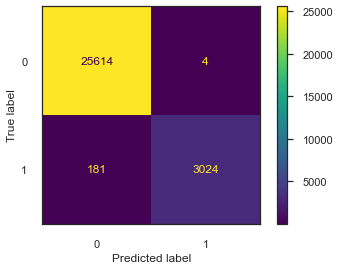

In [63]:
plot_confusion_matrix(model_dt, x_train, y_train)

**Ketepatan hasil prediksi**

In [64]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10919
           1       0.32      0.35      0.33      1434

    accuracy                           0.84     12353
   macro avg       0.62      0.62      0.62     12353
weighted avg       0.84      0.84      0.84     12353



**Hasil Prediksi**

In [65]:
df_dt = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
df_dt.head()

,Actual,Predicted
7403,0,0
29282,0,0
11552,1,0
13634,0,0
7018,0,0


**VISUALISASI DECISION TREE**

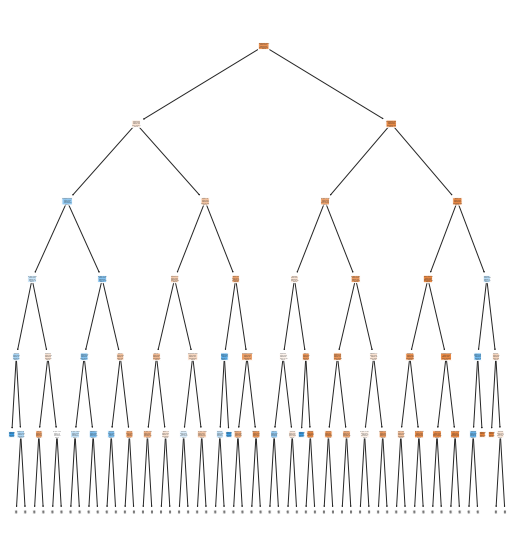

In [66]:
plt.figure(figsize=(9,10))
plot_tree(model_dt,
          class_names=['0', '1'],
          feature_names=columns_features,
          filled = True,max_depth=5,
          rounded=True,
        );

**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi Decision Tree pada data testing yaitu sebesar 0.84 atau 84%

untuk confusion matrix menghasilkan 25.614 + 3.024 prediksi yang benar dan 181 + 4 prediksi yang salah. atau

- 25.614 prediksi negatif yang benar = 25.614 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 181 prediksi negatif yang salah = 181 pengamatan yang salah sebagai nol atau no
- 4 prediksi positif yang salah = 4 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 3.024 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## Random Forest

**Generating Model**

In [67]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)

RandomForestClassifier()

**Prediksi hasil testing dan menghitung akurasi**

In [68]:
y_pred_rf = model_rf.predict(x_test)

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))  

Accuracy of Random Forest classifier on test set: 0.88788


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


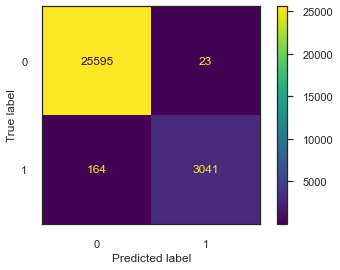

In [69]:
plot_confusion_matrix(model_rf, x_train, y_train)

**Ketepatan hasil prediksi**

In [70]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10919
           1       0.53      0.28      0.37      1434

    accuracy                           0.89     12353
   macro avg       0.72      0.62      0.65     12353
weighted avg       0.87      0.89      0.87     12353



In [71]:
feature_imp = pd.Series(model_rf.feature_importances_, index=columns_features).sort_values(ascending=False)

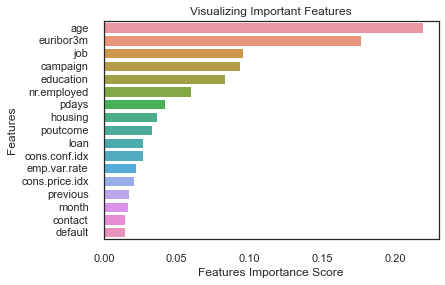

In [72]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi Decision Tree pada data testing yaitu sebesar 0.89 atau 89%

untuk confusion matrix menghasilkan 25.588 + 3.049 prediksi yang benar dan 156 + 30 prediksi yang salah. atau

- 25.588 prediksi negatif yang benar = 25.588 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 156 prediksi negatif yang salah = 156 pengamatan yang salah sebagai nol atau no
- 30 prediksi positif yang salah = 30 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 3.049 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## Naive Bayes

**Generating Model**

In [73]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

**Prediksi hasil testing dan menghitung akurasi**

In [74]:
y_pred_gnb = model_gnb.predict(x_test)

print('Accuracy of Naive Bayes classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gnb)))

Accuracy of Naive Bayes classifier on test set: 0.83688


**Confusion Matrix**

C:\Users\Rizqatasyaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


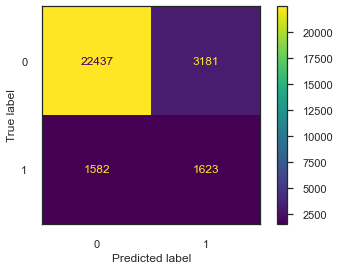

In [75]:
plot_confusion_matrix(model_gnb, x_train, y_train)

**Ketepatan hasil prediksi**

In [76]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10919
           1       0.36      0.52      0.43      1434

    accuracy                           0.84     12353
   macro avg       0.65      0.70      0.67     12353
weighted avg       0.87      0.84      0.85     12353



**INTERPRETASI**

Dapat disimpulkan akurasi pengklasifikasi Decision Tree pada data testing yaitu sebesar 0.84 atau 84%

untuk confusion matrix menghasilkan 22.437 + 1.623 prediksi yang benar dan 1.582 + 3.181 prediksi yang salah. atau

- 22.437 prediksi negatif yang benar = 22.437 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 1.582 prediksi negatif yang salah = 1.582 pengamatan yang salah sebagai nol atau no
- 3.181 prediksi positif yang salah = 3.181 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 1.623 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## Perbandingan 6 Algoritma

In [77]:
print('Accuracy of Logistic Regression classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr)))
print('Accuracy of KNN classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_knn)))
print('Accuracy of SVM classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_svm)))
print('Accuracy of Decision Tree classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_dt)))
print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))
print('Accuracy of Naive Bayes classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gnb)))

Accuracy of Logistic Regression classifier on test set: 0.89703
Accuracy of KNN classifier on test set: 0.89476
Accuracy of SVM classifier on test set: 0.89549
Accuracy of Decision Tree classifier on test set: 0.83947
Accuracy of Random Forest classifier on test set: 0.88788
Accuracy of Naive Bayes classifier on test set: 0.83688


# Kesimpulan

Berdasarkan hasil analisis diatas menggunakan 6 algoritma dapat disimpulkan bahwa algoritma yang baik untuk melakukan prediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). dilihat dari akurasi masing-masing model, model yang memiliki akurasi paling tinggi adalah **Logistic Regression** sebesar **0.89703** dengan menggunakan data training 70% dan data testing 30% yaitu training sebesar 28.823 data dengan 17 kolom, sedangkan testing sebesar 12.353 data dari total keseluruhan data sebanyak 41.176 data (data setelah preprocessing dan cleaning) , dapat diartinya model **Logistic Regression** ini dapat memprediksi dengan akurat.